# Selenium
* 브라우저를 직접 실행하여 자동화하고 브라우저 상에 있는 데이터를 수집
* 웹 테스트 자동화

In [80]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

* `webdriver` : 파이썬과 브라우저를 연결하기 위한 객체
* `Service` :[최신 버전], 어떤 브라우저를 사용하게 할건지 선택
* `ChromeDriverManager` : [최신 버전]Chrome을 사용하기 위한 드라이버 설정

In [81]:
def get_chrome_driver():
    # 1. 크롬 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성하기
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()), # 가장 많이 바뀐 부분
        options = chrome_options
    )
        
    return driver

In [30]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [31]:
driver.get("https://naver.com")

In [32]:
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("진심으로 집에 가고싶다")

In [33]:
driver.find_element(By.CSS_SELECTOR, "#query").clear()
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("진짜 집에 가고싶다")

In [34]:
# 윈도우 사이즈 조절
driver.set_window_size(800, 800)

In [38]:
# 스크롤 위치 조절 - javascript를 입력해야 한다.
#(top, bottom)
# 눈에 보여야만 크롤링이 가능한 데이터가 있다.
driver.execute_script("window.scrollTo(200, 300);")

In [39]:
# 테스트 브라우저 종료 반드시 quit 하기
driver.quit()

# 셀레니움으로 네이버 뉴스기사 크롤링

In [56]:
page = 2
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
url

'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page=2'

In [57]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [58]:
driver.get(url)

In [59]:
articles = driver.find_elements(
    By.CSS_SELECTOR,
    "#section_body li"
)
len(articles)

20

In [60]:
# 첫 번째 기사만 확인
articles[0].text

'[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나\n[서울경제] LG전자(066570) 의 스마트폰 사업 철수로 출시가 좌초됐던 ‘롤 …\n서울경제2시간전\n30\n이상\n+'

In [61]:
# CSS Selector

articles[0].find_element(
    By.CSS_SELECTOR,
    "dt:not(.photo) > a"
).text

'[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나'

In [62]:
article_list = []

for article in articles:
    title = article.find_element(
        By.CSS_SELECTOR,
        "dt:not(.photo) > a"
    
    ).text
    
    article_list.append(title)
article_list

['[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나',
 '[ET톡]삼성 혁신의 시계추',
 '디즈니+ 국내서 172억원 벌었다…넷플릭스는 768억원',
 "TGA 2020 뜬 펄어비스 '붉은사막'…올해 신작 공개하나",
 '[2021결산/반도체] 해소되지 않은 공급난…세계 대전 발발',
 '美 SEC, 테슬라 조사 중..."태양광 패널 위험 요소 숨겼다"',
 '한국 면적의 16배…태평양 쓰레기섬의 ‘뗏목생태계’, 지속가능할까',
 '삼성전자, 3인 대표이사 전원 교체...한종희·경계현 투톱 체제로',
 '‘킥보드’ 카드 꺼낸 T맵, 종합 모빌리티 플랫폼 선언',
 '“우리도 한다”...마트·슈퍼·홈쇼핑도 퀵커머스·새벽배송',
 '셀트리온 코로나19 치료제 렉키로나 호주에서 조건부 승인',
 '우주 경쟁 중심에 섰던 두 남자, 폰 브라운과 코롤료프',
 '하루도 안돼 1600만 팔로워…방탄소년단 개인 인스타시대 개막',
 '삼성전자 대표이사된 한종희는... 국내 최고의 TV 전문가',
 '삼성, 올 3분기 국내 스마트폰 시장 점유율 85% ‘압도적 1위’',
 '‘AI윤석열’ 등장에…고삼석 전 방통위원 “선관위 나서라" 비판',
 '티맵, 내비 넘어 종합 모빌리티 플랫폼으로 도약 선언… “카카오 기다려!”',
 '탄소 제로 시대…수소 비행기 뜬다',
 'EV 투자 불확실성 증대…美 SEC, 테슬라·루시드 조사 착수',
 '오징어게임 떼돈 벌어도 넷플이 독식…"추가 보상안 법제화해야"']

In [63]:
driver.quit()

함수화

In [65]:
article_list=[]

def get_article(page):
    driver = get_chrome_driver()
    url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
    driver.get(url)
    articles = driver.find_elements(
    By.CSS_SELECTOR,
    "#section_body li"
    )
    
    for article in articles:
        title = article.find_element(
            By.CSS_SELECTOR,
            "dt:not(.photo) > a"
        ).text
        article_list.append(title)
    
    print("Crawling : {}".format(page))
    
    driver.quit()

In [66]:
%%time
for page in range(1, 11):
    get_article(page)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 1




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 2




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 3




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 4




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 5




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 6




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 7




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 8




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 9




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 10
Wall time: 44.9 s


# thread를 이용해서 크롤링 하기
* `thread`를 활용하는 이유 : IDLE을 최대한 줄이기 위해서 사용한다.
* 하나의 작업만을 하는 것이 아닌, 동시에 여러 작업을 하기 위함.

대략적으로 40% 시간이 절감된다.

In [67]:
import threading

In [72]:
article_list = []

for page in range(1, 5):
    th = threading.Thread(target=get_article, args=(page, ))
    th.start()



====== WebDriver manager ======




====== WebDriver manager ======


====== WebDriver manager ======
====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome


In [73]:
import time
sec = 0
while len(article_list) < 80:
    # 1초에 한번씩 멈추기
    time.sleep(1)
    sec += 1
    print(sec, end=" ")

Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


1 2 3 4 Crawling : 2
Crawling : 1
5 Crawling : 4
Crawling : 3
6 

# 셀레니움을 이용한 이미지 크롤링
* Youtube 영상을 이미지로 크롤링
* 특정 영역을 자르기
    * pillow : 파이썬에서 이미지를 전처리 해주는 대표적인 패키지
    * 최근에는 opencv가 굉장히 유행중!

In [76]:
import requests # 동영상 다운로드
from PIL import Image as piㅣ# 이미지 다루기

In [83]:
url = "https://www.youtube.com/watch?v=yFZh-Wqi7RI&t=120s"
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [88]:
driver.quit()

In [85]:
driver.get(url)
driver.save_screenshot("my_screenshot.png")
driver.quit()

<bound method ChromiumDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="56693a77ad9cba5cfe9c52388a592851")>>

(929, 887)


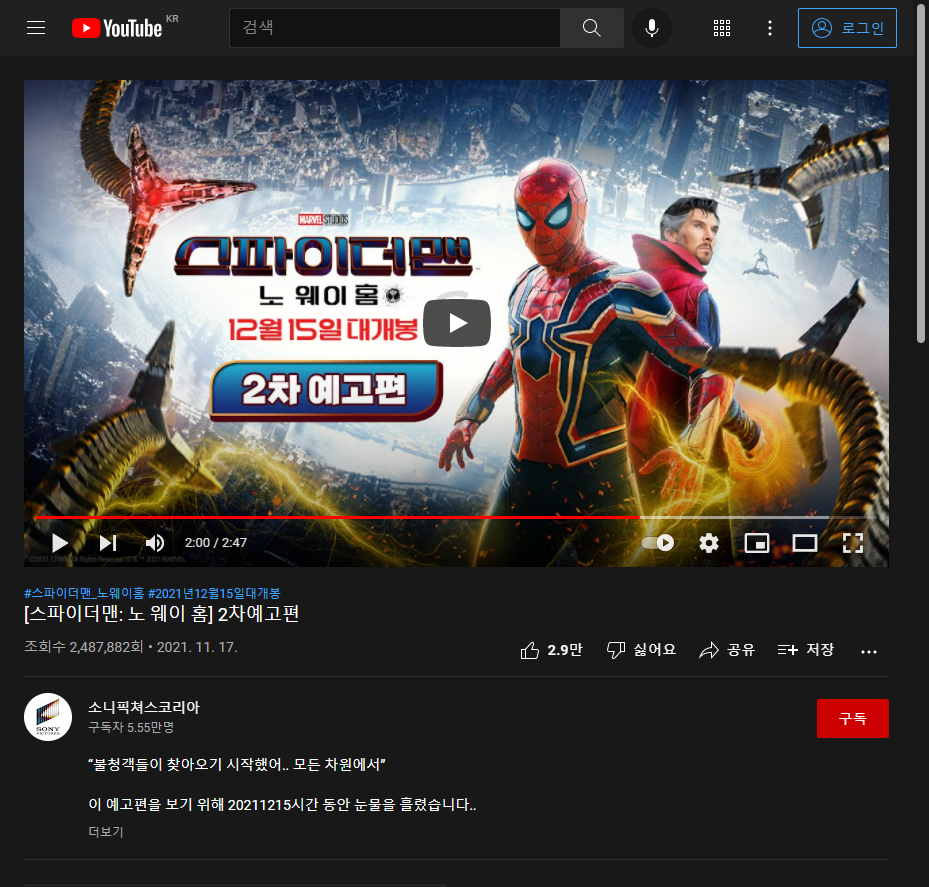

In [87]:
pil_img = pil.open("my_screenshot.png")
print(pil_img.size)
pil_img

In [89]:
driver = get_chrome_driver()
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HKEDU\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [91]:
movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player"
)
movie_player

<selenium.webdriver.remote.webelement.WebElement (session="f20a88f36dbf8538e41fff6d1f292968", element="56669d89-1e1a-43b0-9a1b-7808be6a6d86")>

In [92]:
# element의 위치 찾기
location = movie_player.location
location

{'x': 24, 'y': 80}

In [93]:
# element의 크기 구하기
size = movie_player.size
size

{'height': 271, 'width': 482}

In [99]:
# screenshot 찍기
driver.save_screenshot("spider_man_screenshot.png")

MaxRetryError: HTTPConnectionPool(host='localhost', port=51912): Max retries exceeded with url: /session/f20a88f36dbf8538e41fff6d1f292968/screenshot (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E6CC442B80>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [ ]:
driver.quit()

In [97]:
# 새로 캡쳐한 이미지에서 잘라낼 범위를 계산
# left, top ,right, bottom
left = location['x']
top = location['y']
right = left + size["width"]
bottom = top + size["height"]

area = (left, top, right, bottom)
area

(24, 80, 506, 351)

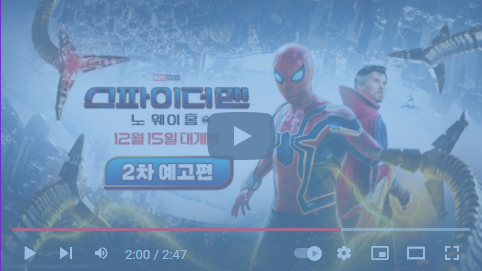

In [98]:
pil_img = pil.open("spider_man_screenshot.png")
croped_image = pil_img.crop(area)
croped_image

In [100]:
croped_image.save("croped_spiderman.png")